## About Dataset
The dataset has data on orders placed by customers on a grocery delivery application.
The dataset is designed with an assumption that the orders are placed by customers living in the state of Tamil Nadu, India.

# Objectives

The objectives of the project is to:

Perform exploratory data analysis to discover any insights and patterns

Find out if there are any products that are performing above/below or above average

The main parts of this project consists of:

Data pre-processing steps

Exploratory data analysis

### Importing Modules
Importing the necessary modules for exploratory data analysis and visualization

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

### Importing the data
Here, i imported the data using the pandas module and created a copy called "supermart" which will be used for the analysis

In [127]:
data=pd.read_csv(r"C:\Users\gbeme\Desktop\Works\Supermart-Grocery-Sales\Supermart-Grocery-Sales.csv")
supermart=data.copy()
supermart.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


# Data Cleaning and Manipulation
I checked various information about the data to know if some data manipulation needs to be carried out on the data.

There are a few things that needs to be checked and done before the analysis can proceed.

Renaming columns to eliminate empty space in between column names

Validating that columns have the appropriate data type

Check and remove N/A values or duplicated values if any

Check for anomalies in categorical and numerical columns (typo errors, values that don't make sense, etc.)

In [128]:
rename_dict = {'Order ID':'order_id',
               'Customer Name':'customer_name',
               'Category':'category',
               'Sub Category':'sub_category',
               'City':'city',
               'Order Date':'order_date',
               'Region':'region',
               'Sales':'sale_price',
               'Discount':'discount',
               'Profit':'profit',
               'State':'state'}

supermart = supermart.rename(columns=rename_dict)

In [129]:
supermart.shape

(9994, 11)

The data has 9,994 rows and 11 columns

##### checking for negative values

In [130]:
supermart.isnull().sum()

order_id         0
customer_name    0
category         0
sub_category     0
city             0
order_date       0
region           0
sale_price       0
discount         0
profit           0
state            0
dtype: int64

##### checking for negative values

In [131]:
(supermart._get_numeric_data() < 0).sum()

sale_price    0
discount      0
profit        0
dtype: int64

##### checking for duplicated rows in the data

In [132]:
supermart.duplicated().sum()

0

##### checking colums data types and general information

In [133]:
supermart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   customer_name  9994 non-null   object 
 2   category       9994 non-null   object 
 3   sub_category   9994 non-null   object 
 4   city           9994 non-null   object 
 5   order_date     9994 non-null   object 
 6   region         9994 non-null   object 
 7   sale_price     9994 non-null   int64  
 8   discount       9994 non-null   float64
 9   profit         9994 non-null   float64
 10  state          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


From the information displayed, i noticed that the "Order Date" column is in the wrong Dtype, this needs to be corrected

#### Changing the Order Date column to datetime Dtype

In [134]:
supermart['order_date']= pd.to_datetime(supermart['order_date'])

#### Creating extra columns 
I created the month_name and year columns from the Order Date column inorder to enable analysis on those columns

In [135]:
# i used a for loop to create the month_name column
supermart['month_name'] = [calendar.month_abbr[num] for num in supermart['order_date'].dt.month]
#0r (if full name is wanted)
#data['Month_name']=data['Order Date'].dt.month_name()

supermart['month']=supermart['order_date'].dt.month
supermart['year']=supermart['order_date'].dt.year
supermart.head(2)

,order_id,customer_name,category,sub_category,city,order_date,region,sale_price,discount,profit,state,month_name,month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,Nov,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,Nov,11,2017


#### Created a function to count the number of unique items in each column

In [136]:
def nuniques(x):
    """ this function counts the number of unique values in each non-numeric column of the n\ dataframe and prints the colunms names and the counts"""
    for col in x.select_dtypes(include=object).columns:
        print(f'There are {x[col].nunique()} {col}')
nuniques(supermart)

There are 9994 order_id
There are 50 customer_name
There are 7 category
There are 23 sub_category
There are 24 city
There are 5 region
There are 1 state
There are 12 month_name


In [137]:
supermart.year.unique()

array([2017, 2016, 2015, 2018], dtype=int64)

In [138]:
supermart[['sale_price','profit','discount']].sum()

sale_price    14956982.00
profit         3747121.20
discount          2266.81
dtype: float64

In [139]:
supermart['region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: region, dtype: int64

There is only one entry for the North region, this is probably a mistake, so it will be dropped

In [140]:
supermart.drop(supermart[supermart.region=='North'].index, inplace=True)
supermart['region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
Name: region, dtype: int64

## Observations from the data
A total of 9994 orders was recorded

There are a total of 50 Customers

All the data is gather from only one state (Tamil Nadu)

There are 7 categories of products which is sub divided into 24 sub categories

A total of 24 cities are represented in the data

The data consist of records covering sales of 4 years (2015 - 2018)

The total Sales over the 4 year period is $14,956,982.00$

The total Profit gained over the 4 year period is $3,747,121.20$

The total Discount given over the 4 year period is $2266.81$

# Questions from the data

##### Top 5 Customers?
The top 5 customers is calculated by the total sales to the customers arranged in decending order

In [141]:
Cus_sales=supermart.groupby('customer_name')[['sale_price']].sum()
Cus_sales.sort_values('sale_price',ascending= False)[:5]

,sale_price
customer_name,
Krithika,334361
Amrish,333351
Verma,331665
Arutra,325720
Vidya,321798


<Figure size 864x576 with 0 Axes>

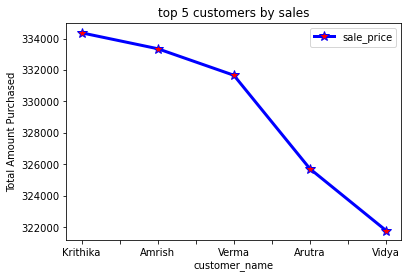

In [142]:
# ploting a bar chart to show the Top 5 Customers table
plt.figure(figsize = (12, 8))
Cus_sales.sort_values('sale_price',ascending= False)[:5].plot( kind = 'line', color ="blue", marker ='*',markersize = 10,markerfacecolor='red',linewidth =3, ylabel = "Total Amount Purchased", title = "top 5 customers by sales");

Krithika made the highest total purchase

##### Which customer received the most discount?

In [143]:
Cus_dis = supermart.groupby('customer_name')[['discount']].sum()
Cus_dis.sort_values('discount',ascending= False)[:5]

,discount
customer_name,
Verma,52.16
Amrish,51.37
Shah,49.59
Krithika,48.64
Arutra,48.43


Verma received the most discount

##### Which category of product is best performing?

In [144]:
prod_perf=pd.pivot_table(supermart, index='category', values=['order_id','profit','sale_price'], aggfunc={'order_id':'count','profit':'sum','sale_price':'sum'})
prod_perf.sort_values('order_id',ascending=False)

,order_id,profit,sale_price
category,,,
Snacks,1514,568178.85,2237546
"Eggs, Meat & Fish",1490,567357.22,2267401
Fruits & Veggies,1418,530400.38,2100727
Bakery,1413,528521.06,2112281
Beverages,1400,525605.76,2085313
Food Grains,1398,529162.64,2115272
Oil & Masala,1360,497494.01,2037188


<AxesSubplot:xlabel='category'>

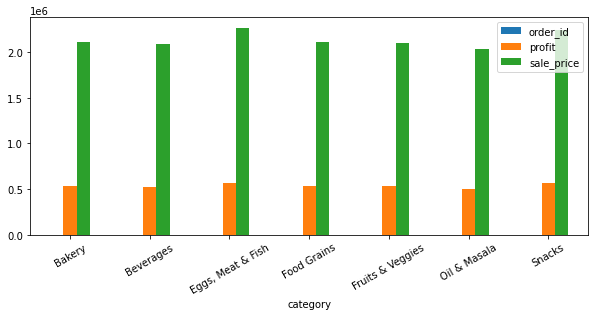

In [145]:
#plot of a multiple bar chart to show the total profit and sales
prod_perf.plot(kind='bar', figsize=(10,4), rot=30)

We can see that snacks are the most profitable category of products and also the best performing in terms of sales

##### Percentage of profit made from each category

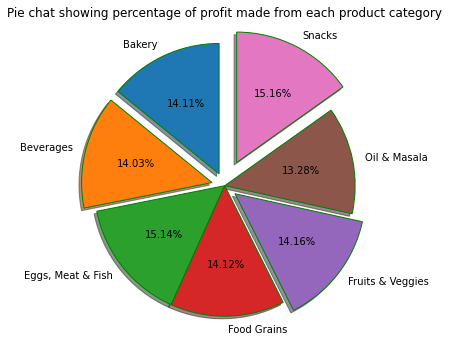

In [146]:
plt.figure(figsize=(6,6))
plt.pie(prod_perf['profit'], labels=prod_perf.index, explode=(0.1,0.1,0.0,0,0.1,0.0,0.2),
        wedgeprops={'linewidth': 1, 'edgecolor':'green'}, shadow=True, autopct= '%1.2f%%', startangle=90)
plt.title('Pie chat showing percentage of profit made from each product category')
plt.savefig('_pie')

The snacks category is the most profitable category of products sold by the store

##### The  top 5 most profitable products?

In [147]:
scat_pro=supermart[['sub_category','profit']].groupby('sub_category').sum().sort_values('profit',ascending=False)
scat_pro[:5]

,profit
sub_category,
Health Drinks,267469.79
Soft Drinks,258135.97
Noodles,193685.81
Breads & Buns,190764.98
Cookies,190643.70


The most profitable product is Health drinks

We should also note that the top 2 most profitable products are beverages, despite beverages not being one of the most profitable categories. 
This might because beverages category has less sub categories.

##### Which city was the higest number of snacks sold?


In [148]:
city_snack=supermart.loc[supermart['category']=='Snacks'].groupby('city').count()[['order_id']]
city_snack.sort_values('order_id',ascending=False)[:5]

,order_id
city,
Kanyakumari,75
Virudhunagar,74
Tirunelveli,72
Perambalur,71
Chennai,68


Most where the most snacks was sold is Kanyakumari where 22 snacks was sold

##### The top most profitable cities?
This shows the city where most profit was made

In [149]:
city_pro=supermart[['city','profit']].groupby(['city']).sum()
city_pro.sort_values('profit',ascending=False)[:5]

,profit
city,
Vellore,173671.73
Bodi,173655.13
Kanyakumari,172217.74
Perambalur,171132.19
Karur,169305.94


Vellore, Bodi and Kanyakumari are the top 3 most profitable cities

##### Cities with the most sales?
This displays the cities with the highest sales total

In [150]:
city_sal=supermart[['city','sale_price']].groupby('city').sum()
city_sal.sort_values('sale_price',ascending=False)[:5]

,sale_price
city,
Kanyakumari,706764
Vellore,675296
Bodi,667177
Tirunelveli,659812
Perambalur,659738


##### How did the products perform in each region?
This shows the regions arranged in the order of total sales and profit

In [151]:
sales_by_region= supermart[['region','sale_price','profit']].groupby('region').sum()
sales_by_region.sort_values('profit', ascending=False)

,sale_price,profit
region,,
West,4798743,1192004.61
East,4248368,1074345.58
Central,3468156,856806.84
South,2440461,623562.89


I used a bar chat to display the number of each category of product sold by region

Text(0.5, 1.0, 'Products Category sales by region')

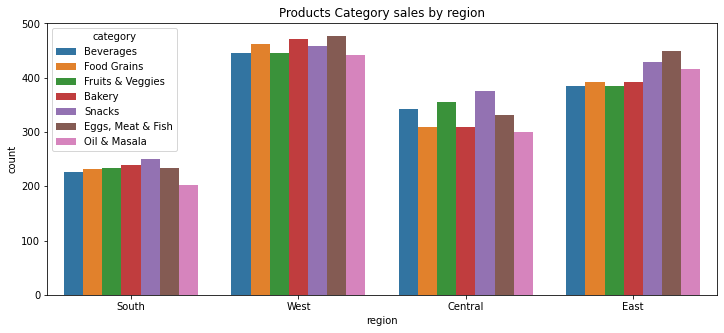

In [152]:
plt.figure(figsize=(12,5))
sns.countplot(data=supermart, x='region', hue=supermart['category'])
plt.title('Products Category sales by region')

From the bar chat, we can see that the West region is the best performing region as it has the higest number of products sold for all categories. One the other hand, the South region is not performing very well.

Eggs, Meat & Fish are the most sold category of product in the West and East while Snacks has the most sales in the Central and South region.

In terms of sales, Oil & Masala is the least performing category of products

The company can do better in the south region.

##### Sales from each region by category
I created a pivot table to present the sales from each region by category of product

In [153]:
region_sales_cat= supermart[['region','category','sale_price']].pivot_table(index = "category",\
        columns ="region", values ="sale_price", aggfunc= "sum")
region_sales_cat

region,Central,East,South,West
category,,,,
Bakery,448343,588241,361385,714312
Beverages,501194,577206,344666,662247
"Eggs, Meat & Fish",516642,677830,360963,711966
Food Grains,463683,598868,353069,699652
Fruits & Veggies,526507,564237,352162,657821
Oil & Masala,453293,622071,298859,662965
Snacks,558494,619915,369357,689780


##### Which of Eggs, Meat & Fish is has the most sale in the West region?
This shows the product from the Eggs,Meat&Fish category that has the highest sale in the west region


In [154]:
EMFs=supermart.groupby('category').get_group('Eggs, Meat & Fish')
west_EMFs= EMFs.loc[supermart['region']=='West'].groupby('sub_category').sum()[['sale_price']]
west_EMFs.sort_values('sale_price', ascending=False)

,sale_price
sub_category,
Mutton,203110
Eggs,180924
Fish,171503
Chicken,156429


Mutton is the product from Egg, Meat & Fish category with the highest sales

##### Which snacks are the most profitable in 2018
This shows the most profitable product from the snacks category in 2018

In [155]:
mart_18=supermart.loc[supermart['year']==2018]
snack_pro= mart_18.loc[supermart['category']=='Snacks'].groupby('sub_category')[['profit']].sum()
snack_pro

,profit
sub_category,
Chocolates,65523.10
Cookies,64955.38
Noodles,65548.02


Chocolates are the most profitable snacks in 2018

##### Product count by city?
This shows the number of product sold per category in each state

In [156]:
prod_count_by_city= supermart[['city','category','order_id']].pivot_table(index = "city",
        columns ="category", values ="order_id", aggfunc= "count")
prod_count_by_city

category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
city,,,,,,,
Bodi,62,62,63,66,76,55,58
Chennai,51,68,67,57,58,63,68
Coimbatore,66,61,68,46,72,57,58
Cumbum,57,57,71,57,51,60,64
Dharmapuri,57,44,55,56,53,57,54
Dindigul,64,53,44,57,62,48,68
Kanyakumari,64,51,73,58,59,79,75
Karur,63,51,76,64,65,52,59
Krishnagiri,70,53,71,63,58,61,64


##### Number of customers that visited each city?
This shows the number of Transactions in each city

In [157]:
Tr_per_city= supermart[['city','order_id']].groupby(['city']).count().sort_values('order_id',ascending=False)
Tr_per_city

,order_id
city,
Kanyakumari,459
Tirunelveli,446
Bodi,442
Krishnagiri,440
Vellore,434
Perambalur,434
Tenkasi,432
Chennai,432
Salem,431


##### Which month does the business have the highest sales?
This shows the highest total sales by months

In [158]:
Month_sales=supermart[['month','month_name','sale_price']].groupby(['month','month_name']).sum()
Month_sales.sort_values('sale_price', ascending=False)

,,sale_price
month,month_name,
11,Nov,2192670
12,Dec,2088076
9,Sep,2064266
10,Oct,1243289
7,Jul,1089385
5,May,1086920
6,Jun,1057808
3,Mar,1053980
8,Aug,1046807


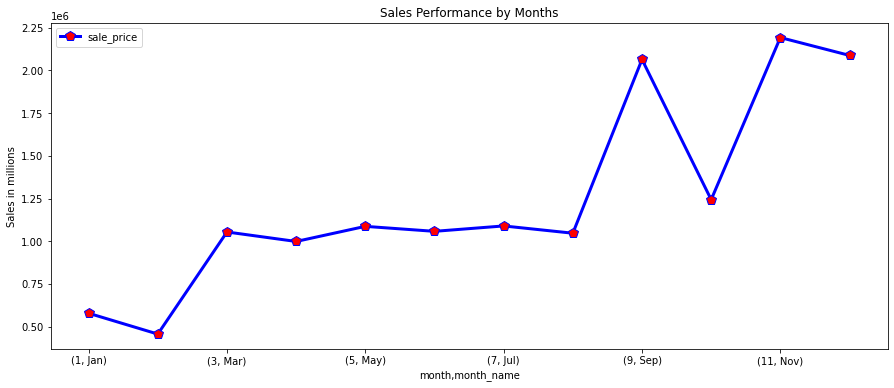

In [159]:
Month_sales.plot( kind = 'line',figsize = (15, 6), color ="blue", marker ='p',markersize = 10,markerfacecolor='red',
    linewidth =3, ylabel = "Sales in millions", title = "Sales Performance by Months");

The business has it's highest sales in November.

From the line graph we can see that the sales are lower at the begining of the year and higher towards the end of the year

##### Which year was the highest profit made?
This shows the sum of profit made in each year

In [160]:
profit_by_year=supermart[['year','profit']].groupby('year').sum()
profit_by_year.sort_values('year',ascending=False)

,profit
year,
2018,1244182.88
2017,952814.94
2016,797192.99
2015,752529.11


<Figure size 432x288 with 0 Axes>

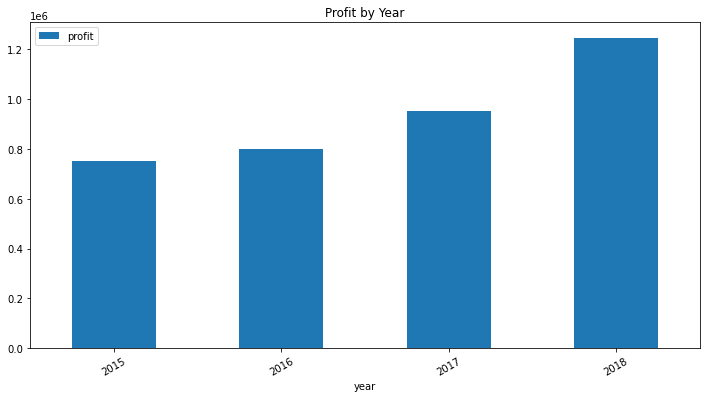

<Figure size 432x288 with 0 Axes>

In [161]:
profit_by_year.plot(kind='bar',figsize=(12,6), rot=30, title='Profit by Year')
plt.figure()

The bar chart shows that the company's profit keeps increasing every year (this is a good indication for the company)

##### Average yearly Sales,Discount and Profit for each year?
This shows the yearly averages of the business

In [162]:
Month_avgs= supermart[['year','sale_price','discount','profit']].groupby(['year']).sum()/supermart['month'].nunique()
round(Month_avgs,2)

,sale_price,discount,profit
year,,,
2015,247966.58,38.01,62710.76
2016,260996.58,39.83,66432.75
2017,322554.83,49.01,79401.24
2018,414792.67,62.05,103681.91


<Figure size 864x576 with 0 Axes>

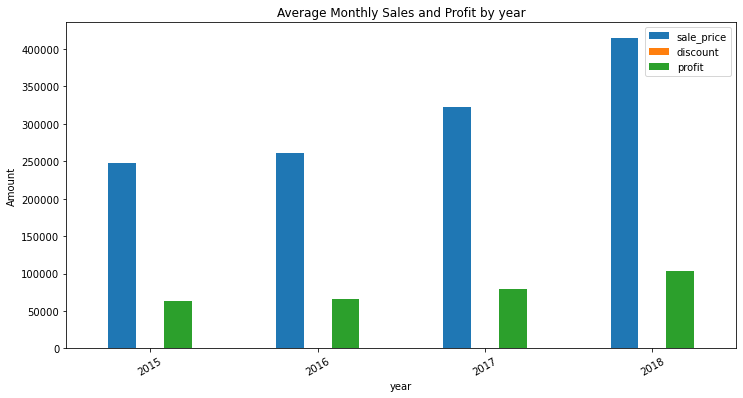

In [163]:
plt.figure(figsize = (12, 8))
Month_avgs.plot( kind = 'bar',figsize=(12, 6),
                ylabel = "Amount", title = "Average Monthly Sales and Profit by year", rot=30);

Text(0.5, 1.0, 'Pie chat showing percentage of sales from each Region')

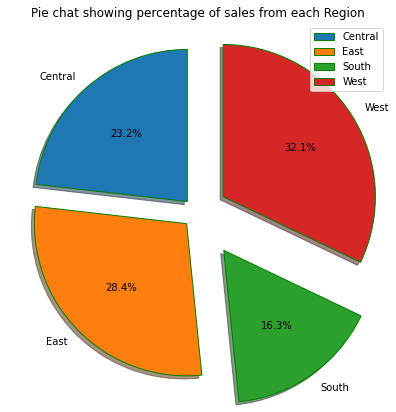

In [164]:
plt.figure(figsize=(7,7))
plt.pie(sales_by_region['sale_price'], labels=sales_by_region.index, explode=(0.1,0.1,0.3,0.2),
        wedgeprops={'linewidth': 1, 'edgecolor':'green'}, shadow=True, autopct= '%1.1f%%', startangle=90)
plt.legend()
plt.title('Pie chat showing percentage of sales from each Region')

In [125]:
#sales from each region by category
region_sales_cat= supermart[['region','category','sale_price']].pivot_table(index = "category",
                        columns ="region", values ="sale_price", aggfunc= "sum")#.groupby(['Region','Category']).sum()#.sort_values('Sales',ascending=False)
region_sales_cat

region,Central,East,South,West
category,,,,
Bakery,448343,588241,361385,714312
Beverages,501194,577206,344666,662247
"Eggs, Meat & Fish",516642,677830,360963,711966
Food Grains,463683,598868,353069,699652
Fruits & Veggies,526507,564237,352162,657821
Oil & Masala,453293,622071,298859,662965
Snacks,558494,619915,369357,689780


# SUMMARY
The supermart is a growing and profitable business as the profit increase yearly from 2015 to 2018.

The west region is the most active region where sales and profit is highest.

All products are doing fairly well with Health drinks and Soft drinks leading the pack, Chicken and rice are the least profitable products.

Snacks is the most profitable category of product and Oil & Masala are the least performing category.

There is always an increase in sale in the last 3 months of the year, with November being the month with the highest sales.

### To drop comments and follow for more:
    
GitHub: [https://Github.com/gbemeegar ](https://Github.com/gbemeegar)
        
LinkedIn: [https://Linkedin.com/in/gbemeegar ](https://LinkedIn.com/in/gbemeegar)
    
Twitter: [https://Twitter.com/datarevealer ](https://Twitter.com/DataRevealer)
    
WhatsApp No: +2348166339922